In [6]:
import numpy as np
fruits = np.load('/home/lws/kulws2025/kubig2025/ml_dl_python/data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [8]:
print(pca.components_.shape)

(50, 10000)


In [9]:
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(
        rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap="gray_r")
            axs[i, j].axis("off")
    plt.show()

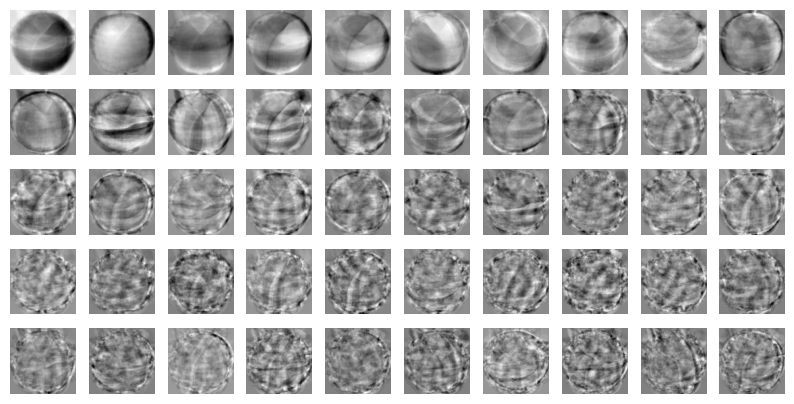

In [10]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [11]:
print(fruits_2d.shape)

(300, 10000)


In [12]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [14]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


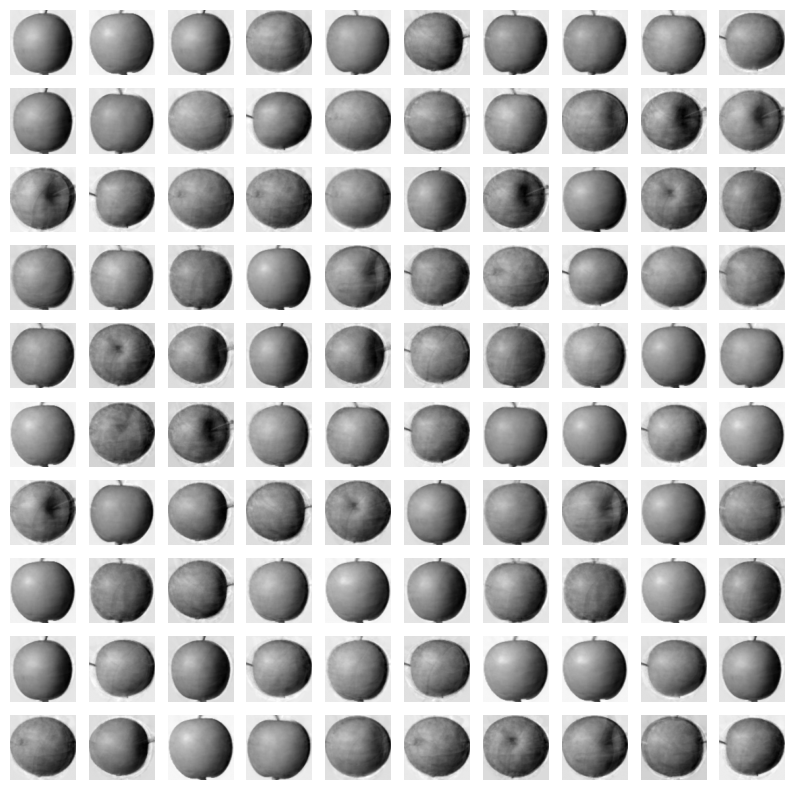

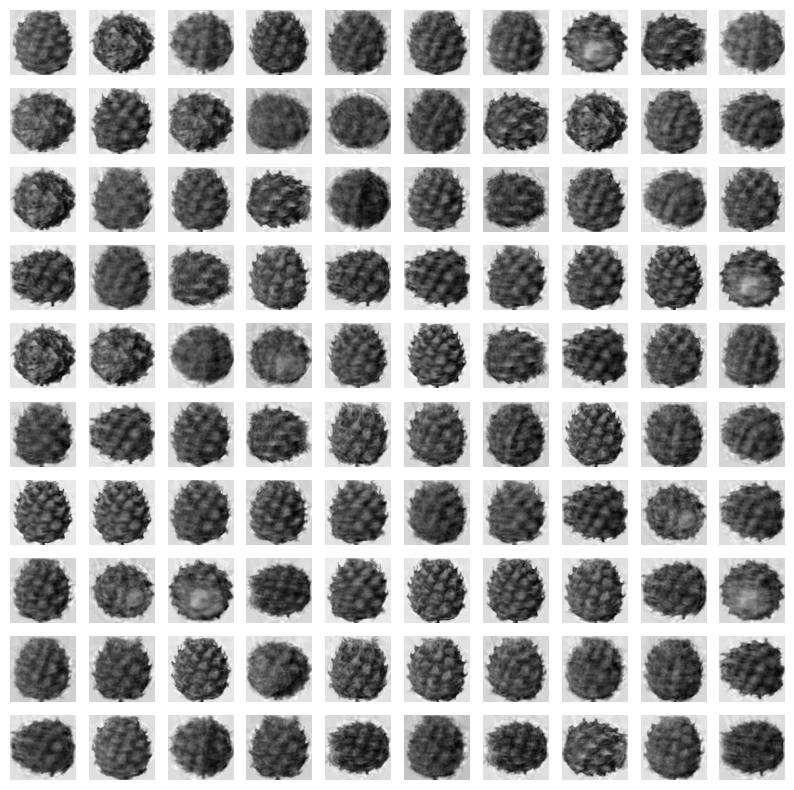

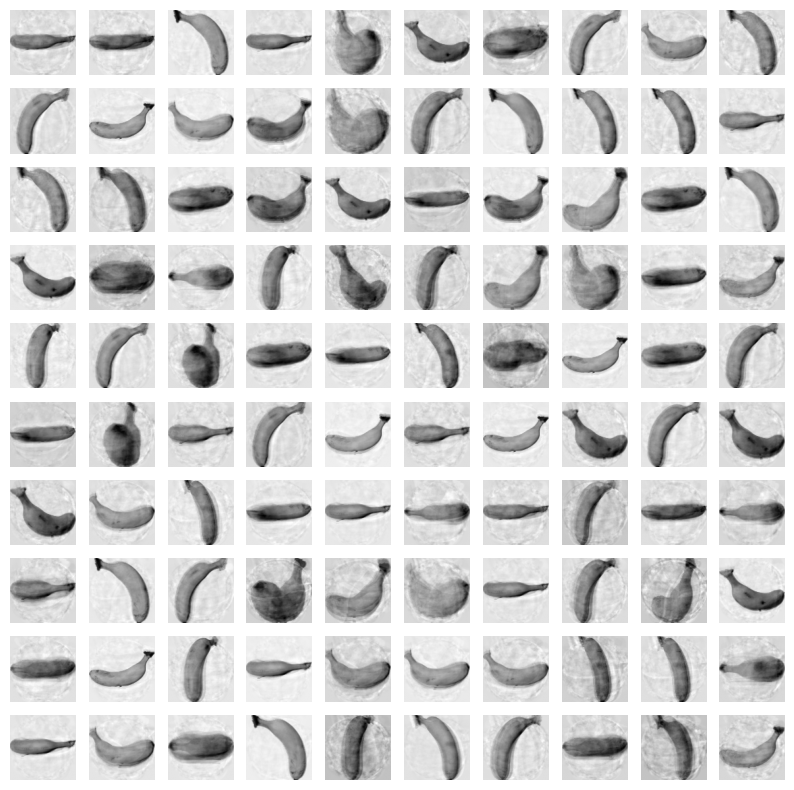

In [16]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [17]:
print(np.sum(pca.explained_variance_ratio_))

0.9216186838138097


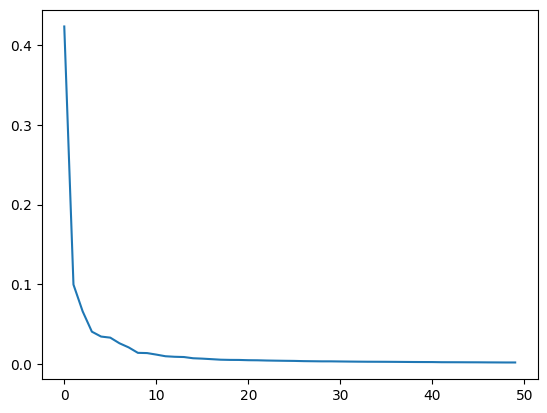

In [18]:
plt.plot(pca.explained_variance_ratio_)
plt.show()